<a href="https://colab.research.google.com/github/normandoamazonas/FinalProject/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure, img_as_ubyte, color
from skimage.filters import threshold_otsu

**Read the satellite images**

The first step is to read the two images for comparison.

Text(0.5, 1.0, 'Landsat 2017')

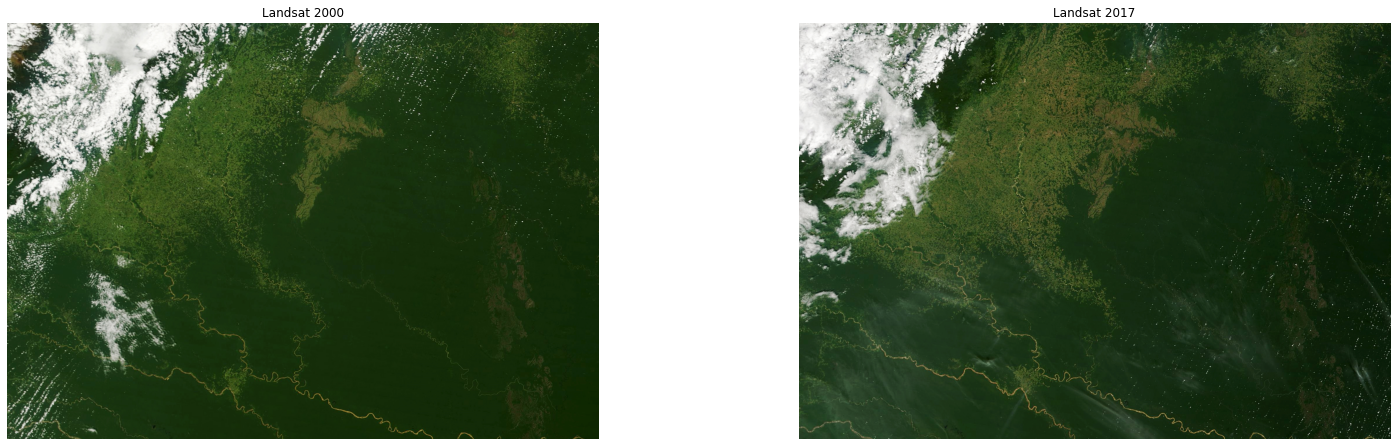

In [2]:
img2000 = imageio.imread("LANDSAT2000.png")
img2017 = imageio.imread("LANDSAT2017.png")

img2000 = np.array(img2000).astype(np.uint8)
img2017 = np.array(img2017).astype(np.uint8)

plt.figure(figsize=(26,26))
plt.subplot(321); plt.imshow(img2000); plt.axis('off'); plt.title('Landsat 2000')
plt.subplot(322); plt.imshow(img2017); plt.axis('off'); plt.title('Landsat 2017')

**Enchancement filters to increase details of the images**



1. First an Adaptive Histogram Equalization filter is applied on both images to saturate different regions of the image and increase the delimitation of each area. 
2. After that, a Laplacian Filter is used to increase the region edges found in the image.



Text(0.5, 1.0, 'Landsat 2017 - Adaptative Histogram Applied')

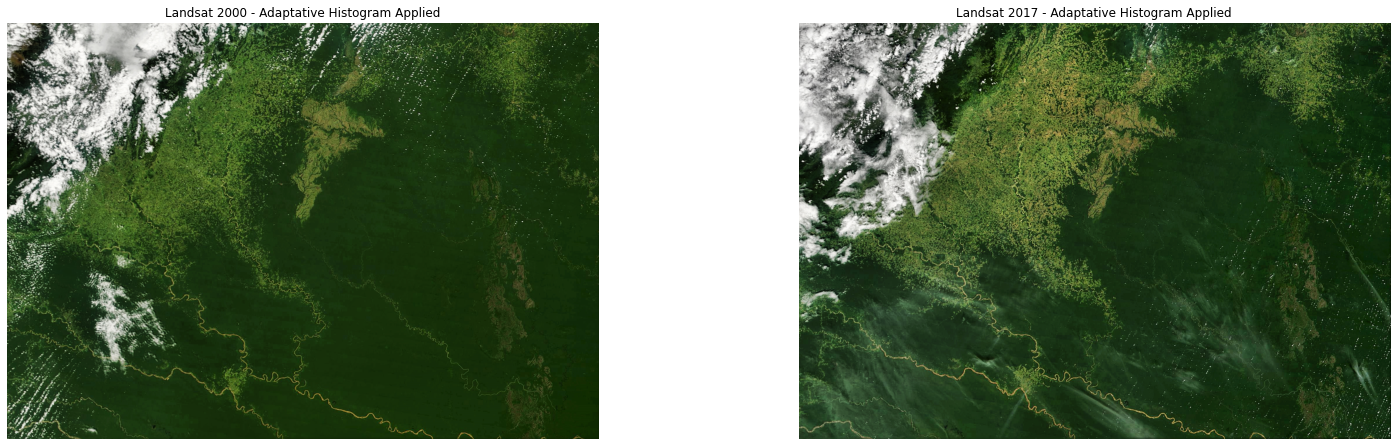

In [16]:
img2000_1 = exposure.equalize_adapthist(img2000, clip_limit=0.0075)
img2017_1 = exposure.equalize_adapthist(img2017, clip_limit=0.0098)

plt.figure(figsize=(26,26))
plt.subplot(321); plt.imshow(img2000_1); plt.axis('off'); plt.title('Landsat 2000 - Adaptative Histogram Applied')
plt.subplot(322); plt.imshow(img2017_1); plt.axis('off'); plt.title('Landsat 2017 - Adaptative Histogram Applied')

In [4]:
def get_rgb_channels(image):
  R = np.array(image[:,:,0])
  G = np.array(image[:,:,1])
  B = np.array(image[:,:,2])
  return R, G, B

def plot_rgb_channels(image, title):
  (R, G, B) = get_rgb_channels(image)
  plt.figure(figsize=(13,13))
  plt.subplot(323); plt.imshow(R, cmap="gray"); plt.axis('off'); plt.title('%s - Red Channel' % title)
  plt.subplot(324); plt.imshow(G, cmap="gray"); plt.axis('off'); plt.title('%s - Green Channel' % title)
  plt.subplot(325); plt.imshow(B, cmap="gray"); plt.axis('off'); plt.title('%s - Blue Channel' % title)

In [5]:
def remove_clouds(image, limit):
  (R, G, B) = get_rgb_channels(image)
  B_uint8 = img_as_ubyte(exposure.rescale_intensity(B))
  nuvens = B_uint8 > limit

  R[nuvens] = 0
  G[nuvens] = 0
  B[nuvens] = 0

  no_clouds = np.array(image, copy=True)
  no_clouds[:,:,0] = R
  no_clouds[:,:,1] = G
  no_clouds[:,:,2] = B

  return no_clouds

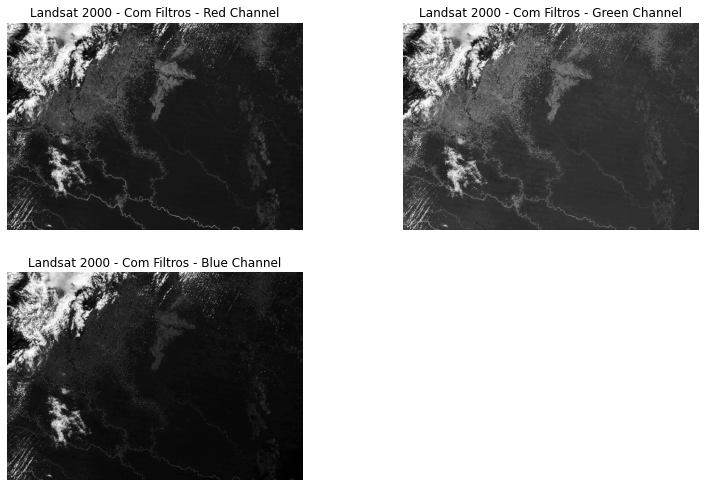

In [6]:
plot_rgb_channels(img2000_1, "Landsat 2000 - Com Filtros")

In [17]:
img2000_2 = remove_clouds(img2000_1, 120)
img2017_2 = remove_clouds(img2017_1, 80)


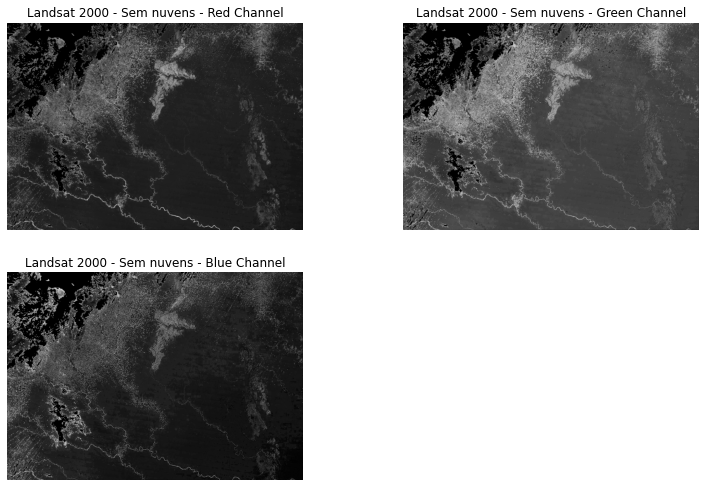

In [8]:
plot_rgb_channels(img2000_2, "Landsat 2000 - Sem nuvens")

Text(0.5, 1.0, 'Landsat 2000 - Sem Nuvens')

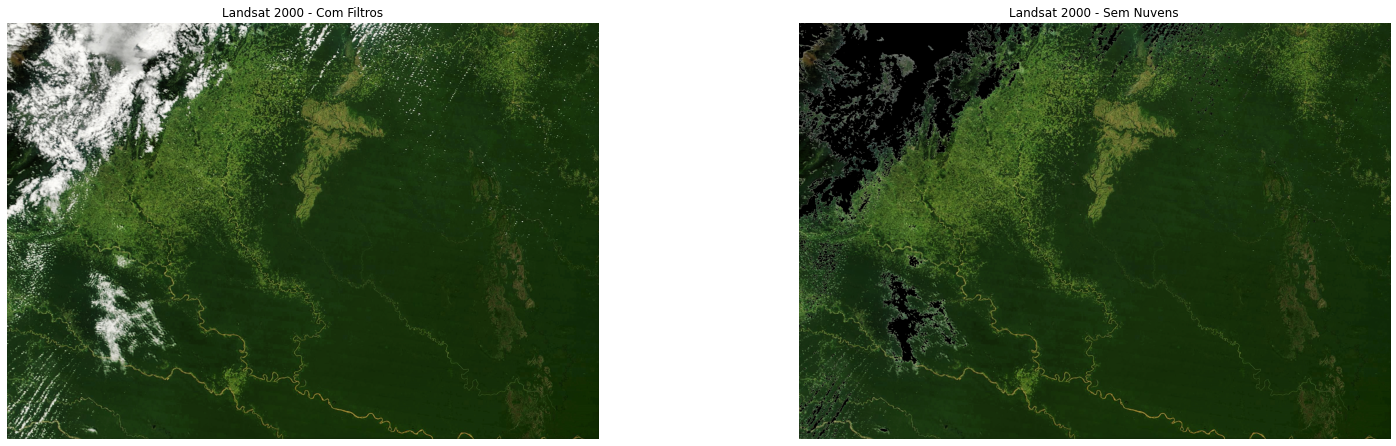

In [9]:
plt.figure(figsize=(26,26))
plt.subplot(323); plt.imshow(img2000_1); plt.axis('off'); plt.title('Landsat 2000 - Com Filtros')
plt.subplot(324); plt.imshow(img2000_2); plt.axis('off'); plt.title('Landsat 2000 - Sem Nuvens')

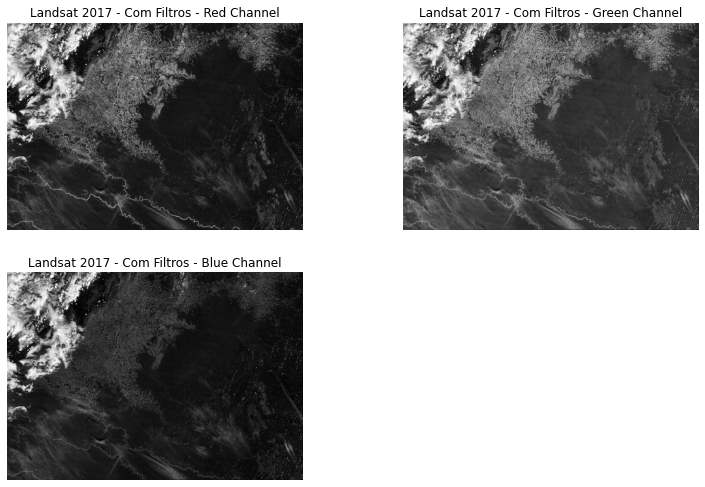

In [10]:
plot_rgb_channels(img2017_1, "Landsat 2017 - Com Filtros")

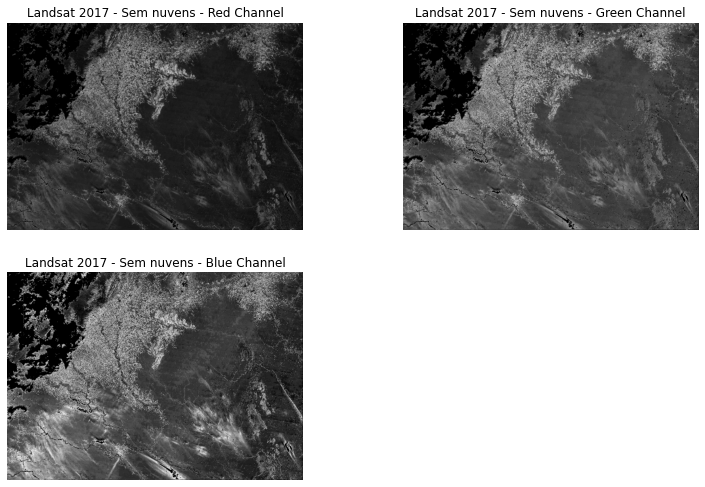

In [11]:

plot_rgb_channels(img2017_2, "Landsat 2017 - Sem nuvens")

Text(0.5, 1.0, 'Landsat 2017 - Sem Nuvens')

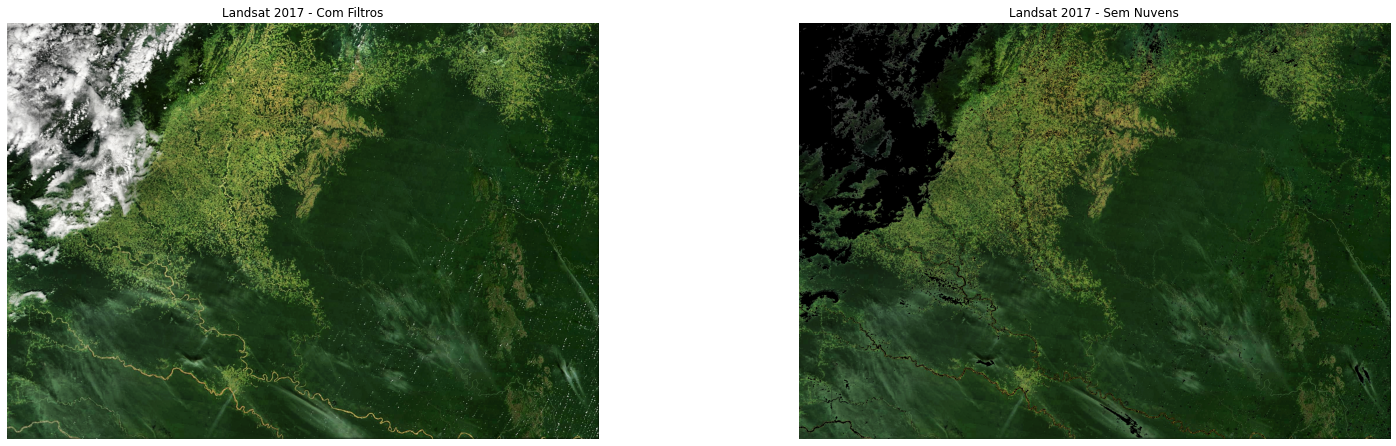

In [12]:
plt.figure(figsize=(26,26))
plt.subplot(323); plt.imshow(img2017_1); plt.axis('off'); plt.title('Landsat 2017 - Com Filtros')
plt.subplot(324); plt.imshow(img2017_2); plt.axis('off'); plt.title('Landsat 2017 - Sem Nuvens')

Text(0.5, 1.0, 'Landsat 2017 - Sem Nuvens')

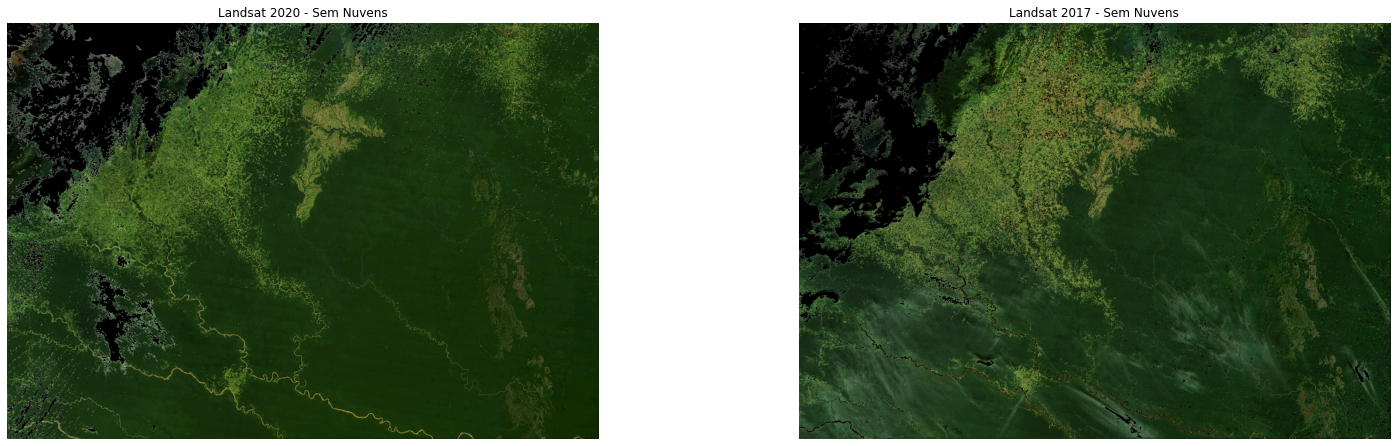

In [18]:
plt.figure(figsize=(26,26))
plt.subplot(323); plt.imshow(img2000_2); plt.axis('off'); plt.title('Landsat 2020 - Sem Nuvens')
plt.subplot(324); plt.imshow(img2017_2); plt.axis('off'); plt.title('Landsat 2017 - Sem Nuvens')

Text(0.5, 1.0, 'Landsat 2017 - Gray scale')

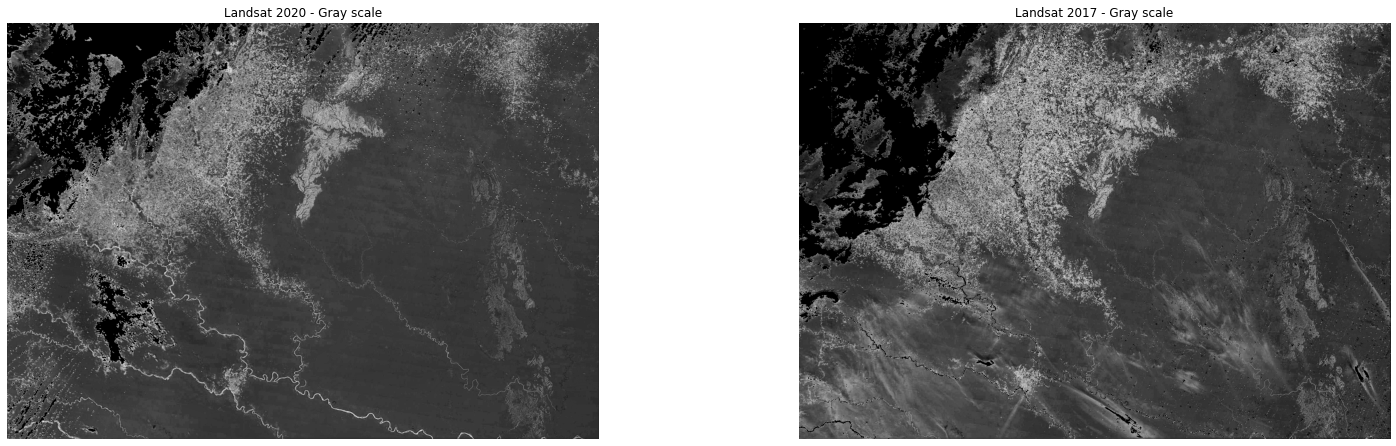

In [19]:
img2000_3 = color.rgb2gray(img2000_2)
img2017_3 = color.rgb2gray(img2017_2)

plt.figure(figsize=(26,26))
plt.subplot(323); plt.imshow(img2000_3, cmap="gray"); plt.axis('off'); plt.title('Landsat 2020 - Gray scale')
plt.subplot(324); plt.imshow(img2017_3, cmap="gray"); plt.axis('off'); plt.title('Landsat 2017 - Gray scale')

Text(0.5, 1.0, 'Landsat 2017 - OTSU Threshold Filter')

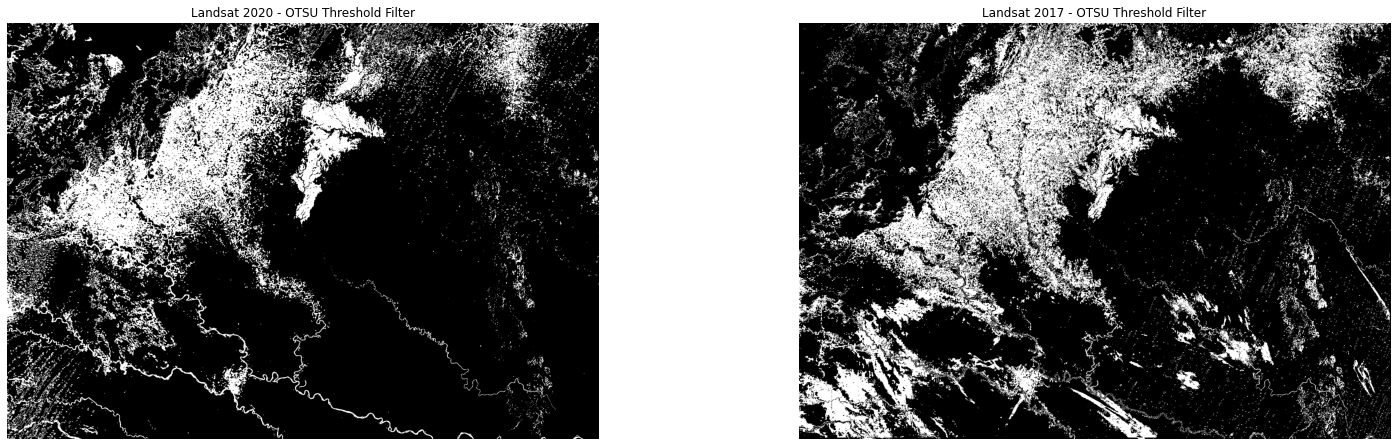

In [20]:
thresh = threshold_otsu(img2000_3)
img2000_4 = img2000_3 > thresh

thresh = threshold_otsu(img2017_3)
img2017_4 = img2017_3 > thresh

plt.figure(figsize=(26,26))
plt.subplot(323); plt.imshow(img2000_4, cmap="gray"); plt.axis('off'); plt.title('Landsat 2020 - OTSU Threshold Filter')
plt.subplot(324); plt.imshow(img2017_4, cmap="gray"); plt.axis('off'); plt.title('Landsat 2017 - OTSU Threshold Filter')